# Airbnb Price Prediction Project

## Problem Statement
The goal of this project is to predict the price of Airbnb listings in New York City using machine learning techniques.

We explore the dataset, clean the data, perform exploratory analysis, and build multiple models to understand which features most strongly influence price.

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load Dataset

In [2]:


df = pd.read_csv("AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## 3. Data Cleaning

In [5]:
df = df.drop(columns=[
    "id",
    "name",
    "host_id",
    "host_name",
    "last_review"
])


In [6]:
df.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## 4. Exploratory Data Analysis

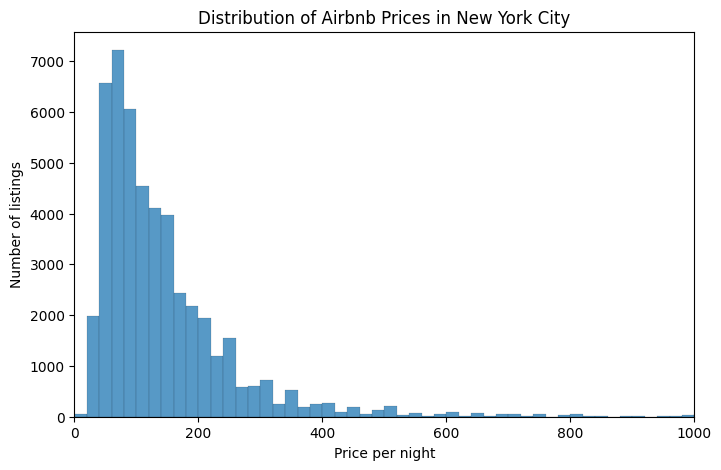

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=500)
plt.xlabel('Price per night')
plt.ylabel('Number of listings') 
plt.xlim(0,1000)
plt.title('Distribution of Airbnb Prices in New York City')
plt.show()

**Inference:**
- Most listings are priced between $50 and $200.
- The distribution is right-skewed with a few high-price outliers.

In [9]:
df=df[df['price']<600]


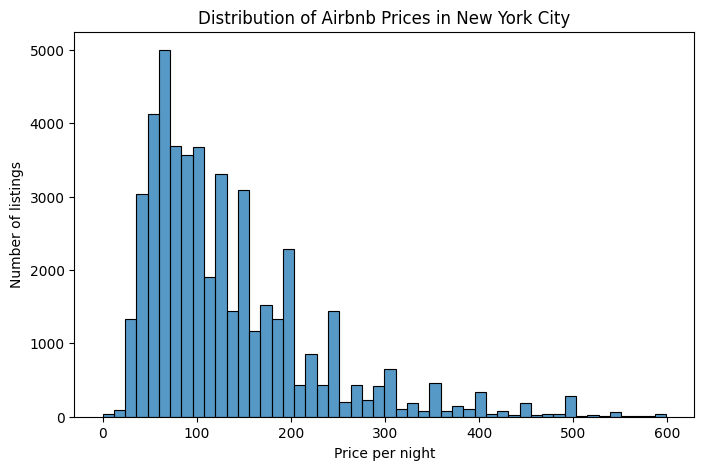

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'],bins=50)
plt.xlabel('Price per night')
plt.ylabel('Number of listings')
plt.title('Distribution of Airbnb Prices in New York City')
plt.show()




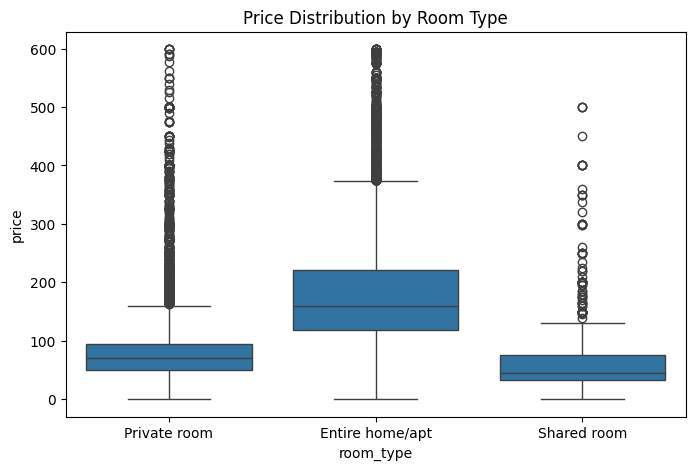

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(x="room_type", y="price", data=df)
plt.title("Price Distribution by Room Type")
plt.show()

**Inference:**
- Entire homes have the highest median price.
- Private rooms are significantly cheaper.

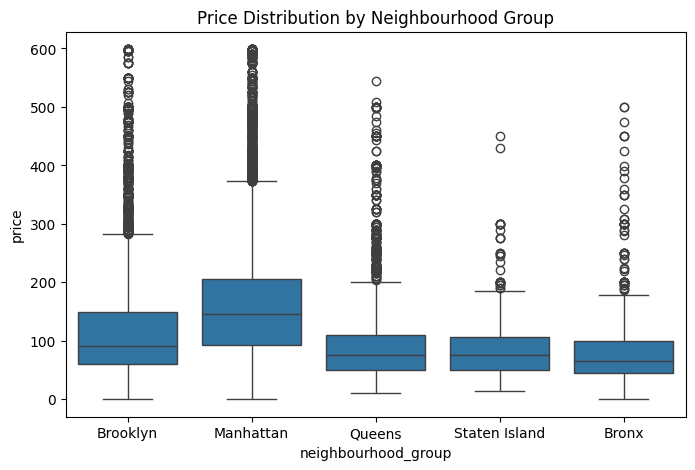

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(x="neighbourhood_group", y="price", data=df)
plt.title("Price Distribution by Neighbourhood Group")
plt.show()

**Inference:**
- Premium neighbourhoods are concentrated in central Manhattan.
- High-demand urban areas command the highest prices.

In [13]:
top_neighbourhoods = (
    df.groupby("neighbourhood")["price"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

top_neighbourhoods

neighbourhood
Neponsit              274.666667
Tribeca               271.238095
NoHo                  265.626667
Willowbrook           249.000000
Flatiron District     243.014085
Midtown               224.740214
West Village          217.491736
Breezy Point          213.333333
SoHo                  210.430341
Financial District    210.093278
Name: price, dtype: float64

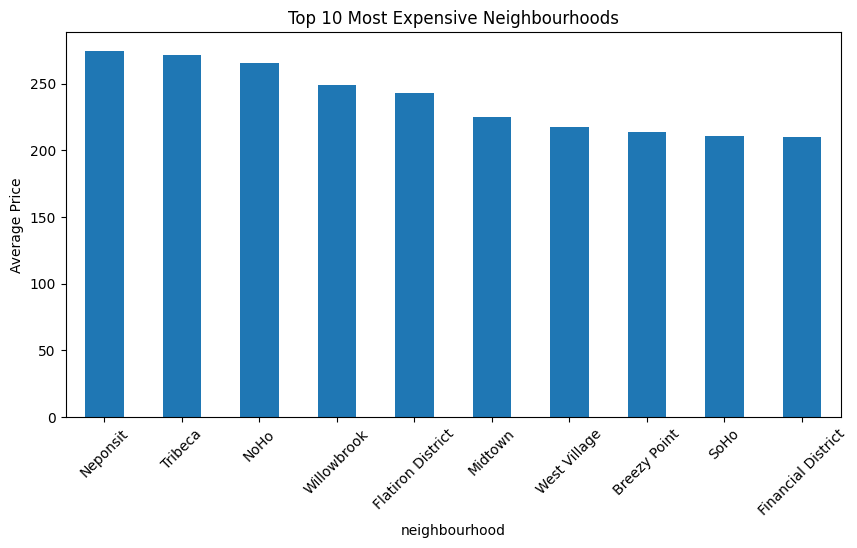

In [14]:
plt.figure(figsize=(10,5))
top_neighbourhoods.plot(kind="bar")
plt.title("Top 10 Most Expensive Neighbourhoods")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

**Inference:**
- Premium neighbourhoods are concentrated in central Manhattan.
- High-demand urban areas command the highest prices.

In [15]:
df.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [16]:
features = [
    "neighbourhood_group",
    "room_type",
    "minimum_nights",
    "number_of_reviews",
    "reviews_per_month",
    "calculated_host_listings_count",
    "availability_365"
]

X = df[features]
y = df["price"]

In [17]:
X.head()

,neighbourhood_group,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,1,9,0.21,6,365
1,Manhattan,Entire home/apt,1,45,0.38,2,355
2,Manhattan,Private room,3,0,0.00,1,365
3,Brooklyn,Entire home/apt,1,270,4.64,1,194
4,Manhattan,Entire home/apt,10,9,0.10,1,0


In [18]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [19]:
X_encoded.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,1,9,0.21,6,365,True,False,False,False,True,False
1,1,45,0.38,2,355,False,True,False,False,False,False
2,3,0,0.00,1,365,False,True,False,False,True,False
3,1,270,4.64,1,194,True,False,False,False,False,False
4,10,9,0.10,1,0,False,True,False,False,False,False


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42
)

In [22]:
X_train.shape, X_test.shape

((38428, 11), (9608, 11))

## 5. Baseline Model: Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 score:", r2)

RMSE: 71.98366985813156
R2 score: 0.38140792002224777


## 6. Random Forest Model (Basic Features)

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

In [31]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [32]:
rf_pred = rf_model.predict(X_test)

In [33]:
mse = mean_squared_error(y_test, rf_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, rf_pred)

print("Random Forest RMSE:", rmse)
print("Random Forest R2:", r2)

Random Forest RMSE: 71.68845631861096
Random Forest R2: 0.3864713543082128


## 7. Feature Engineering: Improved Location Features

In [34]:
features_improved = [
    "neighbourhood",   # more detailed location
    "latitude",
    "longitude",
    "room_type",
    "minimum_nights",
    "number_of_reviews",
    "reviews_per_month",
    "calculated_host_listings_count",
    "availability_365"
]

X2 = df[features_improved]
y2 = df["price"]

In [35]:
X2_encoded = pd.get_dummies(X2, drop_first=True)

In [36]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2_encoded,
    y2,
    test_size=0.2,
    random_state=42
)

## 8. Models with Improved Features

In [37]:
rf_model2 = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf_model2.fit(X2_train, y2_train)

RandomForestRegressor(random_state=42)

In [38]:
rf_pred2 = rf_model2.predict(X2_test)

mse2 = mean_squared_error(y2_test, rf_pred2)
rmse2 = np.sqrt(mse2)
r2_2 = r2_score(y2_test, rf_pred2)

print("Improved Random Forest RMSE:", rmse2)
print("Improved Random Forest R2:", r2_2)

Improved Random Forest RMSE: 64.3700989889853
Improved Random Forest R2: 0.5053423370796815


In [39]:
lr_model2 = LinearRegression()
lr_model2.fit(X2_train, y2_train)

LinearRegression()

In [40]:
lr_pred2 = lr_model2.predict(X2_test)

In [41]:
mse_lr2 = mean_squared_error(y2_test, lr_pred2)
rmse_lr2 = np.sqrt(mse_lr2)
r2_lr2 = r2_score(y2_test, lr_pred2)

print("Improved Linear Regression RMSE:", rmse_lr2)
print("Improved Linear Regression R2:", r2_lr2)

Improved Linear Regression RMSE: 68.47775776363818
Improved Linear Regression R2: 0.44019670549065315


## 9. Final Results and Conclusion

- Baseline Linear Regression: RMSE ≈ 72, R² ≈ 0.38  
- Random Forest (basic features): RMSE ≈ 71.6, R² ≈ 0.38  
- Linear Regression (improved features): RMSE ≈ 68.4, R² ≈ 0.44  
- Random Forest (improved features): RMSE ≈ 64.2, R² ≈ 0.50  

### Key Insights
1. Location features significantly improved model performance.
2. Random Forest outperformed Linear Regression after feature improvements.
3. Feature engineering had a larger impact than simply changing models.

This project demonstrates a complete machine learning workflow including data cleaning, exploratory analysis, baseline modeling, feature engineering, and model comparison.